In [15]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data 
df = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/X_train_update.csv', index_col='Unnamed: 0')
X_test = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/X_test_update.csv', index_col='Unnamed: 0')
y_train = pd.read_csv('/Users/saraskorupa/Documents/rakuten-product-classification/files/Y_train_CVw08PX.csv', index_col='Unnamed: 0')

# Feature Training Data info
display(df.head(10))
df.info()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830
6,Christof E: Bildungsprozessen Auf Der Spur,NaN,91920807,907794536
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347
8,Puzzle Scooby-Doo Avec Poster 2x35 Pieces,NaN,4239126071,1325918866
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [20]:
# Concatenate designation and description variable to handle NaN values
df['designation_description'] = df['designation'].fillna('') + ' ' + df['description'].fillna('')

# Display the updated DataFrame
df[['designation', 'description', 'designation_description']]
df.drop(['designation', 'description'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   productid                84916 non-null  int64 
 1   imageid                  84916 non-null  int64 
 2   designation_description  84916 non-null  object
 3   cleaned                  84916 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [21]:
# Cleaning text data - designation_description
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk

# Download NLTK resources if you don't have them installed
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean function to apply all text cleaning steps
def clean_text(text):
    if pd.isna(text):  # If text is NaN, return empty string
        return ''
    
    # Step 1: Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Step 2: Remove special characters, digits, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Step 3: Convert to lowercase
    text = text.lower()
    
    # Step 4: Remove extra whitespaces
    text = ' '.join(text.split())
    
    # Step 5: Remove stopwords (optional, depends on your use case)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Step 6: Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Assuming X_train is your DataFrame and 'designation' is the column to clean
df['cleaned'] = df['designation_description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saraskorupa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saraskorupa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/z4/tms7jyg136v2x9gmjn8y6pd40000gn/T/ipykernel_3940/4055111693.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Most Common Words:
de: 471379
le: 173114
la: 160101
et: 154121
pour: 99629
en: 95027
x: 92182
cm: 56478
un: 52635
avec: 46335
du: 46183
une: 45991
est: 45083
vous: 42567
votre: 31920
dans: 27142
sur: 26322
ou: 25584
couleur: 24227
taille: 24057
pa: 23614
il: 23002
piscine: 22595
plus: 22417
peut: 21183
ce: 20553
au: 19047
que: 18695
haute: 18591
l: 17796
ne: 17532
par: 17334
qualit: 17140
pc: 16558
tre: 15859
mm: 15725
sont: 14297
qui: 13853
dimension: 13534
facile: 13077
tout: 12612
enfants: 12610
matriel: 12567
produit: 12103
sans: 12020
plat: 11321
jeu: 11161
bois: 10937
leau: 10538
h: 10328
caractristiques: 10118
type: 9966
aux: 9932
acier: 9900
sil: 9851
se: 9596
comme: 9592
vos: 9311
coussin: 9284
lumire: 9161
comprend: 8941
g: 8815
non: 8682
trs: 8682
sac: 8671
led: 8665
dcoration: 8621
bb: 8610
batterie: 8500
taie: 8366
main: 8345
cette: 8343
v: 8202
mode: 8192
dun: 7781
son: 7761
blanc: 7642
poids: 7633
dune: 7539
protection: 7345
mesure: 7333
raison: 7245
style: 7236
inclus: 

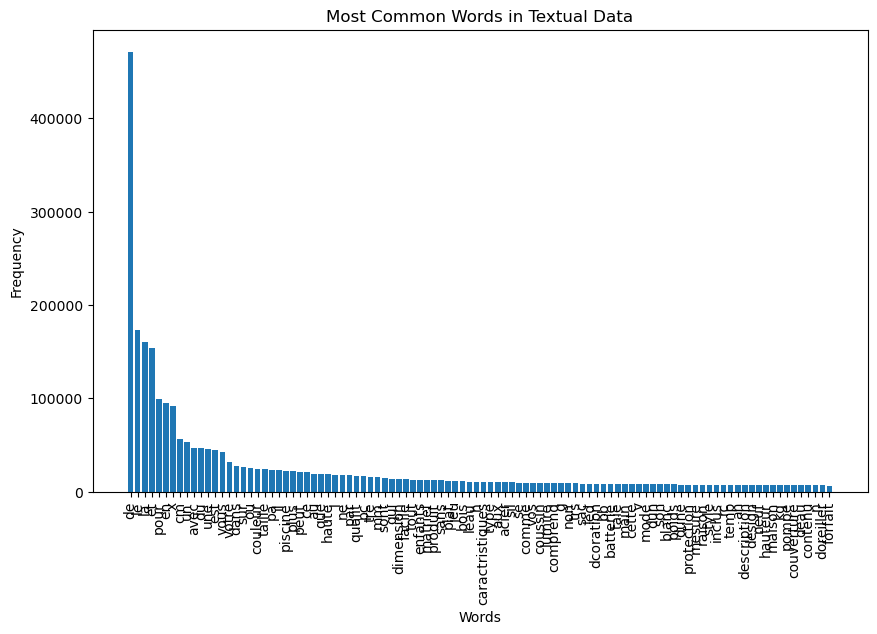

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Tokenize the text into words (you can use the cleaned_designation column)
all_words = ' '.join(df['cleaned'].dropna()).split()

# Step 2: Count word frequencies
word_counts = Counter(all_words)

# Step 3: Get the most common words
most_common_words = word_counts.most_common(100)

# Step 4: Display the most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Step 5: Optional - Visualize the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title('Most Common Words in Textual Data')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Creating Product Classification list

# Step 1: Define the categories and their keywords
categories = {
    'Home & Garden': ['maison','salle', 'piscine', 'spa', 'jardin', 'piscine gonflable', 'bois', 'acier', 'pompe'],
    'Toys & Games': ['jouet', 'jeu', 'jouets', 'figurine', 'puzzle', 'toy', 'console', 'nintendo', 'xbox', 'jeu vidéo', 'robot', 'peluche', 'dragon', 'gamepad'],
    'Tech & Electronics': ['led', 'portable', 'drone', 'camera', 'quadcopter', 'wifi', 'game', 'playstation', 'xbox', 'chargeur', 'batterie', 'dvd', 'power', 'pc'],
    'Outdoor & Sports': ['sport', 'plage', 'bal', 'canne à pêche', 'voiture', 'vélo', 'camion', 'gonflable'],
    'Furniture & Decor': ['lumire','coussin', 'canapé', 'couverture', 'housse', 'table', 'fauteuil', 'rideau', 'lit', 'tapis','coussin', 'couverture', 'décoratif', 'fauteuil', 'bureau', 'canapé', 'meuble', 'lampe', 'décoration', 'table', 'tapis', 'rideau', 'cadre', 'miroir', 'étagère', 'décor'],
    'Baby & Kids': ['bébé', 'enfants', 'poussette', 'doudou', 'lit bébé', 'bavoir', 'poupée'],
    'Fashion & Accessories': ['mode', 'vêtements', 'sac', 'accessoires', 'bijou', 'chaussettes', 'main'],
    'Food & Kitchen': ['cuisine', 'café', 'fruits', 'panier', 'chocolat'],
    'Books & Stationery': ['livre', 'carnet', 'crayon', 'papier', 'agenda', 'cahier', 'notizbuch', 'journal'],
    'Seasonal': ['hiver', 'halloween', 'printemps', 'Noël']
}


# Step 2: Modify categorization function to check substring presence
def categorize_keyword(text):
    text = text.lower()  # Convert the entire text to lowercase
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in text:  # Check if the keyword is a substring of the text
                return category
    return 'Uncategorized'  # Default category if no match is found

# Step 3: Apply the categorization function to the 'cleaned_designation' column
df['category'] = df['cleaned'].apply(categorize_keyword)

# Show the result
print(df[['designation_description', 'cleaned', 'category']])


                                 designation_description  \
0      Olivia: Personalisiertes Notizbuch / 150 Seite...   
1      Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2      Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3      Peluche Donald - Europe - Disneyland 2000 (Mar...   
4      La Guerre Des Tuques Luc a des id&eacute;es de...   
...                                                  ...   
84911                       The Sims [ Import Anglais ]    
84912  Kit piscine acier NEVADA déco pierre Ø 3.50m x...   
84913  Journal Officiel De La Republique Francaise N°...   
84914  Table Basse Bois De Récupération Massif Base B...   
84915  Gomme De Collection 2 Gommes Pinguin Glace Ver...   

                                                 cleaned            category  
0      olivia personalisiertes notizbuch seiten punkt...  Books & Stationery  
1      journal de art le n du lart et son marche salo...  Books & Stationery  
2      grand stylet ergonomique bleu gamep

In [27]:
# Checking count of each category in the dataset 
display(df.head())
category_counts = df['category'].value_counts()
print(category_counts)

# How can I in

,productid,imageid,designation_description,cleaned,category
0,3804725264,1263597046,Olivia: Personalisiertes Notizbuch / 150 Seite...,olivia personalisiertes notizbuch seiten punkt...,Books & Stationery
1,436067568,1008141237,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,journal de art le n du lart et son marche salo...,Books & Stationery
2,201115110,938777978,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,grand stylet ergonomique bleu gamepad nintendo...,Home & Garden
3,50418756,457047496,Peluche Donald - Europe - Disneyland 2000 (Mar...,peluche donald europe disneyland marionnette d...,Toys & Games
4,278535884,1077757786,La Guerre Des Tuques Luc a des id&eacute;es de...,la guerre de tuques luc de ides de grandeur il...,Toys & Games


category
Home & Garden            40769
Uncategorized            26218
Toys & Games              8204
Tech & Electronics        2335
Outdoor & Sports          2108
Books & Stationery        2058
Fashion & Accessories     1327
Baby & Kids               1014
Furniture & Decor          607
Food & Kitchen             144
Seasonal                   132
Name: count, dtype: int64


In [33]:
# Save preprocessed data 
df.to_csv('processed_data.csv', index=False)